<a href="https://colab.research.google.com/github/Subhashka2002/ML/blob/main/decisiontreeforKyphosisdata(subhash).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
data = pd.read_csv("kyphosis.csv")

In [4]:
data

,Unnamed: 0,Kyphosis,Age,Number,Start
0,1,absent,71,3,5
1,2,absent,158,3,14
2,3,present,128,4,5
3,4,absent,2,5,1
4,5,absent,1,4,15
...,...,...,...,...,...
76,77,present,157,3,13
77,78,absent,26,7,13
78,79,absent,120,2,13
79,80,present,42,7,6


In [5]:
data.head()

,Unnamed: 0,Kyphosis,Age,Number,Start
0,1,absent,71,3,5
1,2,absent,158,3,14
2,3,present,128,4,5
3,4,absent,2,5,1
4,5,absent,1,4,15


In [6]:
data.filter(["Kyphosis","Age"]).head()

,Kyphosis,Age
0,absent,71
1,absent,158
2,present,128
3,absent,2
4,absent,1


In [7]:
import matplotlib.pyplot as plot

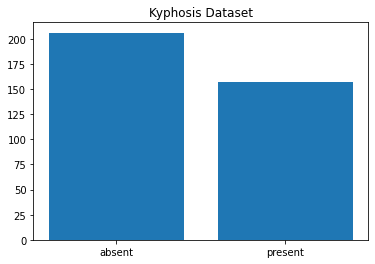

In [8]:
plot.bar(data["Kyphosis"],data["Age"])
plot.title("Kyphosis Dataset")
plot.show()

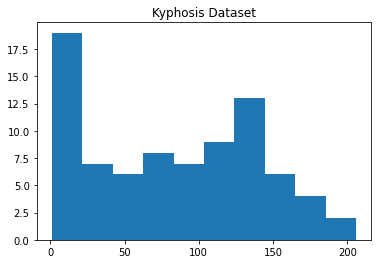

In [9]:
plot.hist(data["Age"])
plot.title("Kyphosis Dataset")
plot.show()

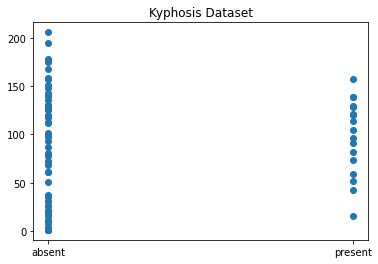

In [10]:
plot.scatter(data["Kyphosis"],data["Age"])
plot.title("Kyphosis Dataset")
plot.show()

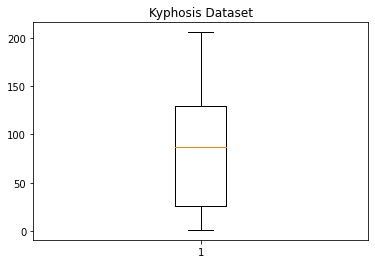

In [11]:
plot.boxplot(data["Age"])
plot.title("Kyphosis Dataset")
plot.show()

In [12]:
data.isnull().sum()

Unnamed: 0    0
Kyphosis      0
Age           0
Number        0
Start         0
dtype: int64

In [14]:
import numpy as np
import pandas.util.testing as tm
import statsmodels.formula.api as sm

In [15]:
data.describe()

,Unnamed: 0,Age,Number,Start
count,81.000000,81.000000,81.000000,81.000000
mean,41.000000,83.654321,4.049383,11.493827
std,23.526581,58.104251,1.619423,4.883962
min,1.000000,1.000000,2.000000,1.000000
25%,21.000000,26.000000,3.000000,9.000000
50%,41.000000,87.000000,4.000000,13.000000
75%,61.000000,130.000000,5.000000,16.000000
max,81.000000,206.000000,10.000000,18.000000


In [16]:
data[data.isnull().any(axis=1)]

,Unnamed: 0,Kyphosis,Age,Number,Start


In [17]:
y =data['Age']
x =data.drop(['Age'], axis=1)

In [18]:
print(x.head())

   Unnamed: 0 Kyphosis  Number  Start
0           1   absent       3      5
1           2   absent       3     14
2           3  present       4      5
3           4   absent       5      1
4           5   absent       4     15


In [19]:
from sklearn.preprocessing import LabelEncoder
y=LabelEncoder().fit_transform(y)
print(y[:10])

[23 56 46  1  0  0 21 16 39 20]


In [20]:
x = pd.get_dummies(x)
print(x.head())

   Unnamed: 0  Number  Start  Kyphosis_absent  Kyphosis_present
0           1       3      5                1                 0
1           2       3     14                1                 0
2           3       4      5                0                 1
3           4       5      1                1                 0
4           5       4     15                1                 0


In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [22]:
print(x_train.head())

    Unnamed: 0  Number  Start  Kyphosis_absent  Kyphosis_present
43          44       4      1                1                 0
4            5       4     15                1                 0
72          73       4     16                1                 0
17          18       5     13                1                 0
63          64       3     16                1                 0


In [23]:
print(x_test.head())

    Unnamed: 0  Number  Start  Kyphosis_absent  Kyphosis_present
22          23       3     12                0                 1
27          28       3     14                1                 0
61          62       7      8                0                 1
13          14       4     12                1                 0
71          72       4     12                1                 0


In [24]:
print(y_train[:10])

[21  0 30 59 41 39 21 36  9  1]


In [25]:
print(y_test[:10])

[33 35 40  0 45  5 13 24  1  3]


In [26]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state = 0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [27]:
y_pred=classifier.predict(x_test)

In [28]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score,recall_score, precision_score, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, average_precision_score

In [29]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [30]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       2.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       1.0
           4       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       1.0
           8       0.00      0.00      0.00       0.0
           9       0.00      0.00      0.00       0.0
          13       0.00      0.00      0.00       1.0
          14       0.00      0.00      0.00       1.0
          15       0.00      0.00      0.00       1.0
          16       0.00      0.00      0.00       1.0
          18       0.00      0.00      0.00       0.0
          20       0.00      0.00      0.00       0.0
          21       0.00      0.00      0.00       0.0
          22       0.00      0.00      0.00       1.0
          23       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [31]:
accuracy_score(y_test,y_pred)

0.0

[Text(0.5420524691358025, 0.9444444444444444, 'X[2] <= 13.5\nentropy = 5.343\nsamples = 56\nvalue = [4, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1\n1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1\n1, 1]'),
 Text(0.30092592592592593, 0.8333333333333334, 'X[0] <= 55.0\nentropy = 4.696\nsamples = 31\nvalue = [1, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1\n1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0\n0, 1, 1, 2, 2, 0, 2, 1, 0, 0, 0, 1, 0, 1\n0, 0]'),
 Text(0.14506172839506173, 0.7222222222222222, 'X[3] <= 0.5\nentropy = 4.122\nsamples = 20\nvalue = [1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1\n1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0\n0, 0, 1, 1, 2, 0, 2, 1, 0, 0, 0, 0, 0, 1\n0, 0]'),
 Text(0.06172839506172839, 0.6111111111111112, 'X[0] <= 31.5\nentropy = 2.522\nsamples = 7\nvalue = [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1\n1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0\n0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0\n0, 0]'),
 Text(0.024691358024691357, 0.5, 'X[0] <= 16.0\nentropy

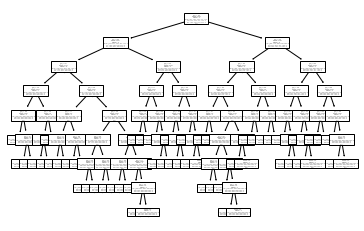

In [32]:
from sklearn.tree import plot_tree
plot_tree(classifier)

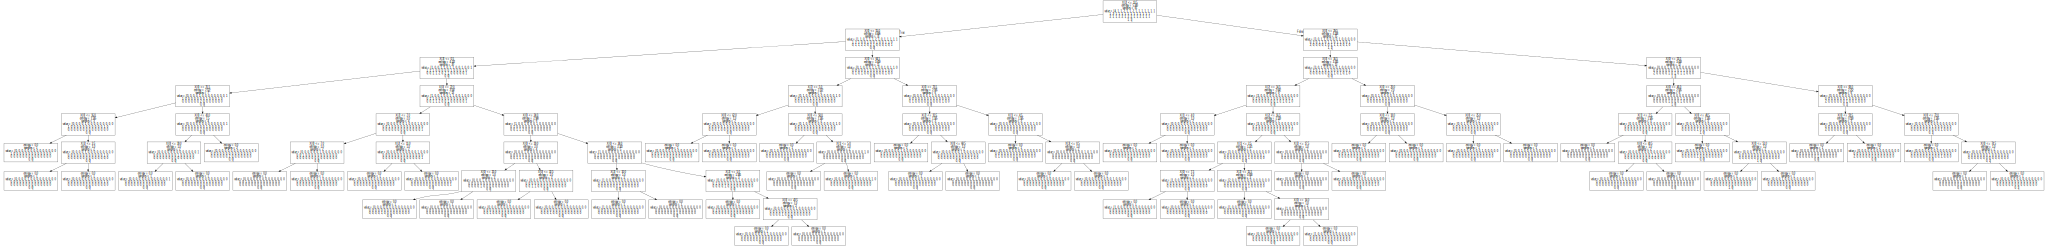

In [37]:
import graphviz as graph # Refer to https://forum.graphviz.org/t/new-simplified-installation-procedure-on-windows/224
from sklearn import tree
dot_data = tree.export_graphviz(classifier)
graph = graph.Source(dot_data)
graph